In [16]:
# import libraries
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
print(X.shape)
print(y.T.shape)
print(y.shape)
print(y)

(70000, 784)
(70000,)
(70000,)
['5' '0' '4' ... '4' '5' '6']


In [6]:
# shape
print(X.shape)
print(y.shape)

# Normalize
X = X/255
print(type(y[1]))


(70000, 784)
(70000,)
<class 'str'>


In [7]:
#  we’re just building a zero-classifier for now. So we want our labels to say 1 when we have a zero, and 0 otherwise

y_new = np.zeros((y.shape[0],1))
y_new[y == '0'] = 1
y_new[y != '0'] = 0
y_new.shape
y = y_new

In [8]:
# Transform data --> each example in a column instead of a row

m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:,].T
y_train, y_test = y[:m].reshape(1, m), y[m:].reshape(1,m_test)


In [9]:
print(X_train.shape) # One example in each column
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(784, 60000)
(784, 10000)
(1, 60000)
(1, 10000)


In [10]:
# Shuffle the training set
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

In [11]:
X_train[:,3].shape

(784,)

[1.]


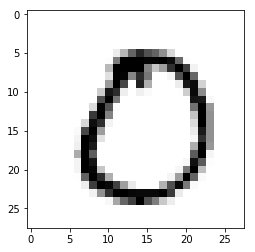

In [12]:
# Random image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 40
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
print(y_train[:,i])

# label is 0, because we are just training a binary classifier

## A Single Neuron ( Logistic Regression) - Binary Classification

In [14]:
# Sigmoid

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s
def compute_loss(Y,Y_hat):
    m = Y.shape[1]
    L = -(1 / m) * np.sum ( (Y * np.log(Y_hat)) + ((1 - Y) * np.log(1 - Y_hat))  )
    return L

Iteration :  0 cost :  0.7263006056785202
Iteration :  100 cost :  0.10780319201314666
Iteration :  200 cost :  0.0824625478744789
Iteration :  300 cost :  0.07144010045401572
Iteration :  400 cost :  0.06486648979075173
Iteration :  500 cost :  0.060371653532519526
Iteration :  600 cost :  0.05704978983365463
Iteration :  700 cost :  0.05446699342121631
Iteration :  800 cost :  0.0523852248660814
Iteration :  900 cost :  0.050661427413769645
Iteration :  1000 cost :  0.049203761175445185
Iteration :  1100 cost :  0.04795022650374353
Iteration :  1200 cost :  0.04685727107225562
Iteration :  1300 cost :  0.045893296084802936
Iteration :  1400 cost :  0.04503475152110202
Final cost -  0.044271009373437115


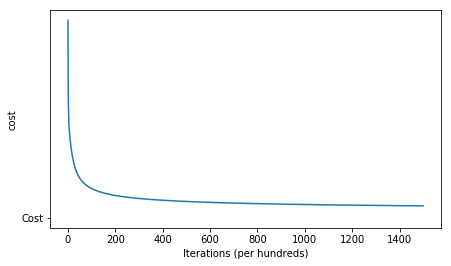

In [21]:
learning_rate = 0.05

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))
costs =[]
for i in range(1500):
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    
    cost = compute_loss(Y, A)
    costs.append(cost)
    
    dW = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A -Y, axis =1 , keepdims = True)
    
    W = W - (learning_rate * dW)
    b = b - (learning_rate * db)
    
    if (i % 100 ==0):
        print ("Iteration : ", i, "cost : ", cost)
print ("Final cost - ", cost)

plt.plot(costs)
plt.plot('Cost')
plt.ylabel('cost')
plt.xlabel('Iterations (per hundreds)')
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

#predictions = (A > 0.5)[0,:]
#labels = (y_test == 1)[0,:]
#print(confusion_matrix(predictions, labels))

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]


print(confusion_matrix(labels, predictions))

# We got 937 of the zeroes predicted correctly and missed 49.

[[8972   48]
 [  43  937]]


In [24]:
print (classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      9015
        True       0.96      0.95      0.95       985

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.99      0.99      0.99     10000



## One Hidden Layer - Binary Classification

In [ ]:
# Add a hidden layer with 64 units

Epoch 0 cost:  0.6903198990031804
Epoch 100 cost:  0.30594501022602405
Epoch 200 cost:  0.28438362070248474
Epoch 300 cost:  0.260001774557773
Epoch 400 cost:  0.23418903477385983
Epoch 500 cost:  0.20829212994681884
Epoch 600 cost:  0.18266527650716438
Epoch 700 cost:  0.1579914991050164
Epoch 800 cost:  0.13625309284132034
Epoch 900 cost:  0.11869359387916259
Epoch 1000 cost:  0.1050969671463142
Epoch 1100 cost:  0.09463231351000462
Epoch 1200 cost:  0.08647010243365733
Epoch 1300 cost:  0.07996837806483686
Epoch 1400 cost:  0.0746727073791755
Final cost -  0.07031083587101863


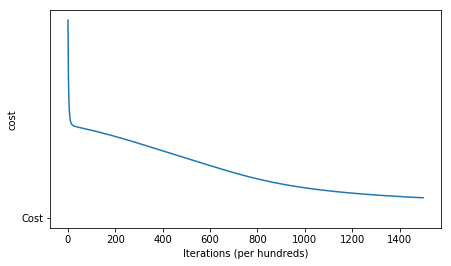

In [25]:
X = X_train
Y = y_train

n_x = X.shape[0]
n_h = 64
learning_rate = 0.05

W1 = np.random.randn(n_h, n_x) * 0.01
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(1, n_h) * 0.01
b2 = np.zeros((1,1))

costs = []
for i in range(1500):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cost = compute_loss(Y, A2)
    costs.append(cost)
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.dot(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if i % 100 == 0:
        print("Epoch", i, "cost: ", cost) 
print('Final cost - ', cost)

plt.plot(costs)
plt.plot('Cost')
plt.ylabel('cost')
plt.xlabel('Iterations (per hundreds)')
plt.show()

In [26]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = (A2>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[8977  154]
 [  43  826]]
              precision    recall  f1-score   support

       False       1.00      0.98      0.99      9131
        True       0.84      0.95      0.89       869

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.92      0.97      0.94     10000
weighted avg       0.98      0.98      0.98     10000



## Multiclass Classification

In [27]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [28]:
X, y = mnist['data'], mnist['target']
X = X / 255

In [29]:
# Reshape Y

digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)
Y_new.shape

(10, 70000)

In [30]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

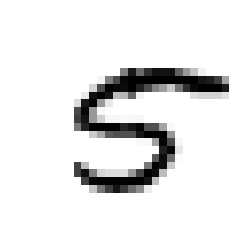

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [31]:
i = 32
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [33]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

Epoch 0 cost:  9.025251742649532
Epoch 100 cost:  0.7830063415030658
Epoch 200 cost:  0.5903056440926701
Epoch 300 cost:  0.5047152142048258
Epoch 400 cost:  0.452997990678821
Epoch 500 cost:  0.416873907892621
Epoch 600 cost:  0.38945936861679203
Epoch 700 cost:  0.36751861787986007
Epoch 800 cost:  0.3493326206980456
Epoch 900 cost:  0.33389337050368445
Final cost: 0.32066726293383263


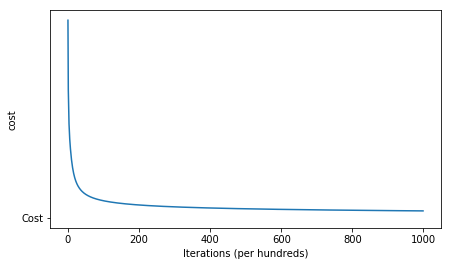

In [34]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

costs = []
for i in range(1000):

    Z1 = np.dot(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)
    costs.append(cost)

    dZ2 = A2 - Y
    dW2 = (1./m) * np.dot(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.dot(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)
plt.plot(costs)
plt.plot('Cost')
plt.ylabel('cost')
plt.xlabel('Iterations (per hundreds)')
plt.show()

## Accuracy, Confusion Matrix

In [35]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 954    0   10    4    1   10   10    3    8    5]
 [   0 1112    4    3    0    3    3    9   11    9]
 [   3    1  908   25    3    5   10   30   15    5]
 [   3    3   29  898    1   44    2    9   27   11]
 [   1    1   11    1  873   10   17    8    6   49]
 [   6    0    5   26    3  760   16    3   32    7]
 [   8    2    9    3   20   19  891    1    9    2]
 [   1    1   20   11    4    9    2  921   11   29]
 [   4   14   31   25   11   24    7    7  845   23]
 [   0    1    5   14   66    8    0   37   10  869]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1005
           1       0.98      0.96      0.97      1154
           2       0.88      0.90      0.89      1005
           3       0.89      0.87      0.88      1027
           4       0.89      0.89      0.89       977
           5       0.85      0.89      0.87       858
           6       0.93      0.92      0.93       964
           7       0.90      0.91   

### Accuracy is 90 percent. In the next upload, I will try to optimize this algorithm